# Neuroprostetics exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
f = [10, 100, 1000]
A = [1 , 10, 2]
t = 1
sr = 100000
vt = np.linspace(0, t, t/( 1/sr))
    

def signal(f, A, t, sr, A0):
    T = np.linspace(0, t, t/(1/sr))
    F = A0
    D = {};
    for i in range(len(A)):
        D[i] = A[i] * np.sin(2 * np.pi * f[i] * T)
        F += A[i] * np.sin(2 * np.pi * f[i] * T)

    return F, T, D

ar, T, D = signal(f, A, t, sr, 1)

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


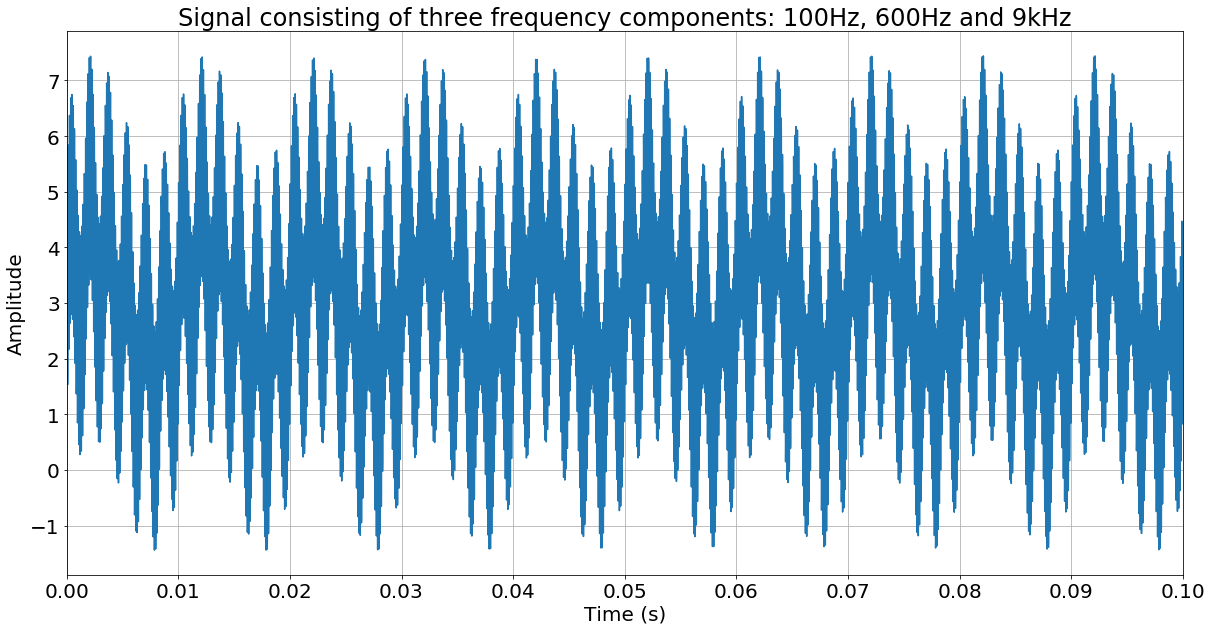

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

f = [100, 600, 9000]
A = [1, 1.5, 2]
t = 0.1
A0 = 3
sr = 100000


ar, T, D = signal(f, A, t, sr, A0)
    
fig, ax = plt.subplots(figsize=(20, 10));
ax.grid()
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time (s)')
ax.set_title('Signal consisting of three frequency components: 100Hz, 600Hz and 9kHz')
plt.xticks(np.arange(min(T) , max(T)+1, 0.01))
plt.yticks(np.arange(-2, 8, 1))

plt.plot(T, ar)
plt.xlim(0, 0.1)

plt.savefig('report/1.png', dpi=300)

In [4]:
# fft() -> div by number of inp samples -> add up negative and positive frequency bins
def fft_calc2(X, sr, t):
    L = t*sr
    Y = np.fft.fft(X);
    f = np.linspace(0, sr*10**-3/2, L/2+1)
    
    P2 = np.abs(Y/L);
    P1 = P2[0:int(L/2+1)];    
    P1[1:-1] = 2*P1[1:-1]
    
    return P1, P2, f

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


<Container object of 3 artists>

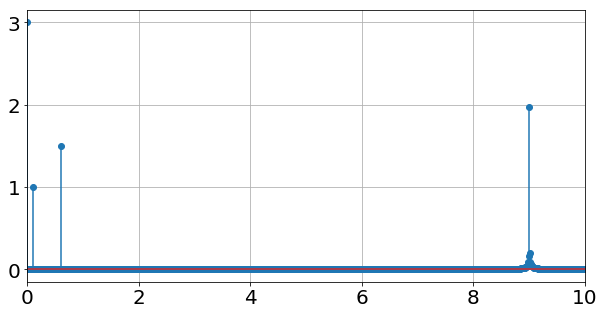

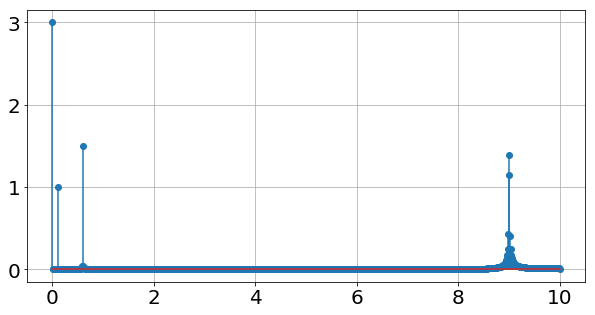

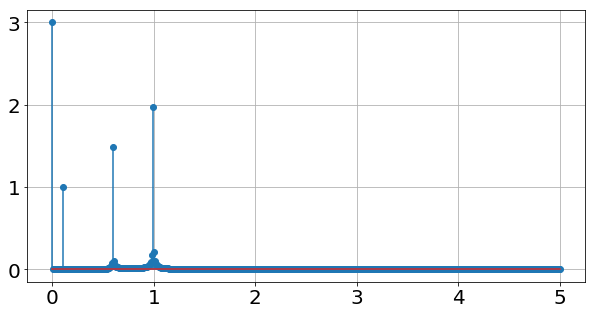

In [5]:
f = [100, 600, 9000]
A = [1, 1.5, 2]
t = 0.1
A0 = 3
sr = 100000

X,  T, D  = signal(f, A, t, sr, A0)
P1, P2, f1 = fft_calc2(X, sr, t)

fig, ax = plt.subplots(figsize=(10,5))
ax.grid()
plt.xlim(0, 10);
plt.stem(f1, P1)

# 20 kHz
f = [100, 600, 9000]
A = [1, 1.5, 2]
t = 0.1
A0 = 3
sr = 20000

X,  T, D  = signal(f, A, t, sr, A0)
P1, P2, f1 = fft_calc2(X, sr, t)

fig, ax = plt.subplots(figsize=(10,5))
ax.grid()
plt.stem(f1, P1)

# 10khz
f = [100, 600, 9000]
A = [1, 1.5, 2]
t = 0.1
A0 = 3
sr = 10000

X,  T, D  = signal(f, A, t, sr, A0)
P1, P2, f = fft_calc2(X, sr, t)

fig, ax = plt.subplots(figsize=(10,5))
ax.grid()
plt.stem(f, P1)

In [6]:
# calculate FFT
f = [100, 600, 9000]
A = [1, 1.5, 2]
t = 0.1
A0 = 3

X,  T , D = signal(f, A, t, 100000, A0)
P10, P20, f0 = fft_calc2(X, 100000, t)
X,  T , D = signal(f, A, t, 20000, A0)
P11, P21, f1 = fft_calc2(X, 20000, t)
X,  T , D = signal(f, A, t, 10000, A0)
P12, P22, f2 = fft_calc2(X, 10000, t)

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


/home/ateska/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


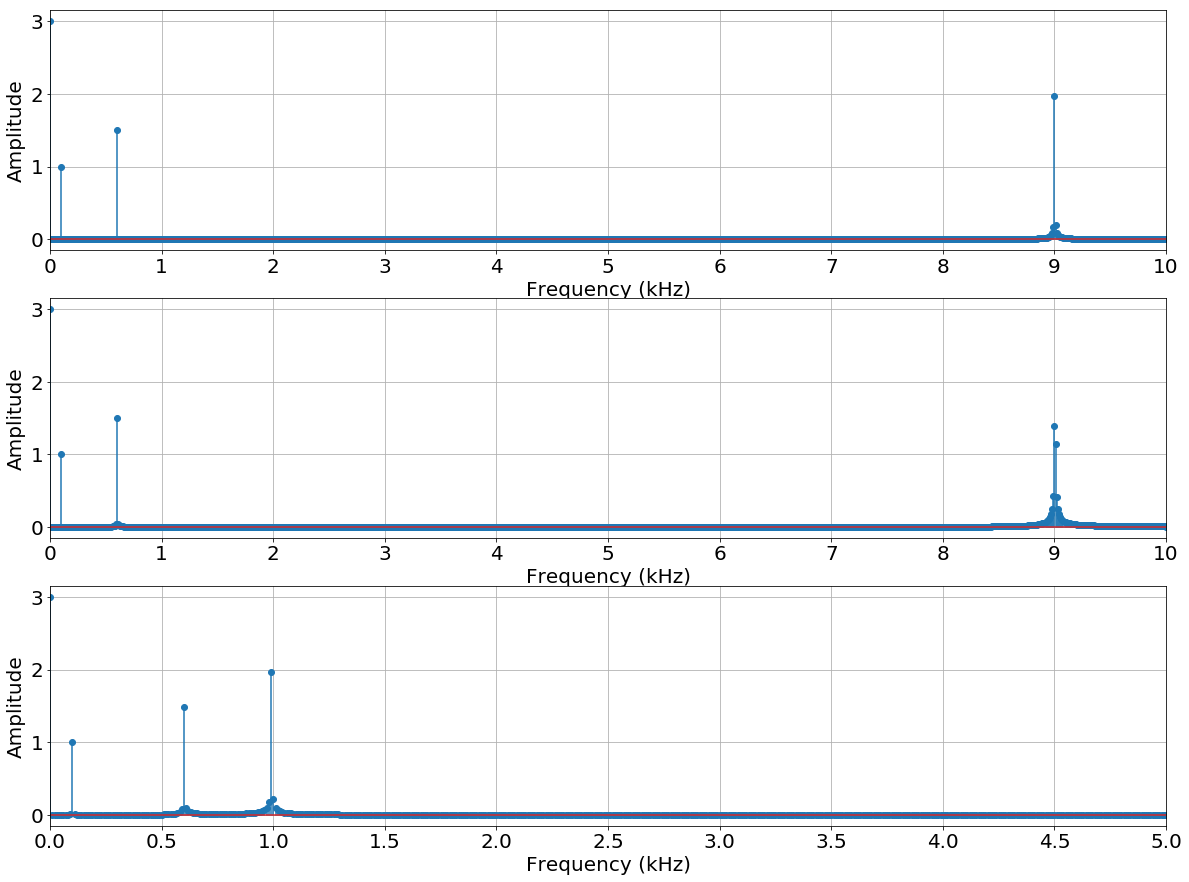

In [7]:
# Plot FFT
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.grid()
ax2.grid()
ax3.grid()

ax1.set_xlabel('Frequency (kHz)')
ax2.set_xlabel('Frequency (kHz)')
ax3.set_xlabel('Frequency (kHz)')
ax1.set_ylabel('Amplitude')
ax2.set_ylabel('Amplitude')
ax3.set_ylabel('Amplitude')

ax.set_title('Single sided amplitude spectrums of the signal with different sampling rates')
# ax2.set_title('Single sided amplitude spectrum of the signal, sampling rate=20 kHz')
# ax3.set_title('Single sided amplitude spectrum of the signal, sampling rate=10 kHz')

plt.subplot(311)
plt.stem(f0, P10)
plt.xticks(np.arange(min(f0) , max(f0)+1, 1))
plt.xlim(0,10)

plt.subplot(312)
plt.stem(f1, P11)
plt.xticks(np.arange(min(f1) , max(f1)+1, 1))
plt.xlim(0,10)

plt.subplot(313)
plt.stem(f2, P12)
plt.xticks(np.arange(min(f2) , max(f2)+1, 0.5))
plt.xlim(0,5)

plt.savefig('report/2.png', dpi=300)